## Classification


### 3.1 Data 1: separate 2 Gaussians

Generating data

mu1 = (0, 0)
mu2 = (1, 1)

cov1 = cov2 = \begin{bmatrix}1\quad 0\\0\quad 1\end{bmatrix}

In [241]:
import numpy as np
from matplotlib import pyplot
from plotnine import *
%matplotlib inline
import matplotlib.pyplot as plt

np.random.seed(42)

mu_vec1 = np.array([0, 0])

mu_vec2 = np.array([1, 1])

cov_mat1 = np.array([[1,0],[0,1]])

cov_mat2 = np.array([[1,0],[0,1]])

# Draw random samples from a multivariate normal distribution 


class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20).T
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20).T


print (class1_sample.shape)


(2, 20)


### Just to get a rough idea how the samples of our two classes a and b are distributed, let us plot them in a 3D scatter plot.

In [242]:
from plotnine import *
%matplotlib inline
import matplotlib.pyplot as plt

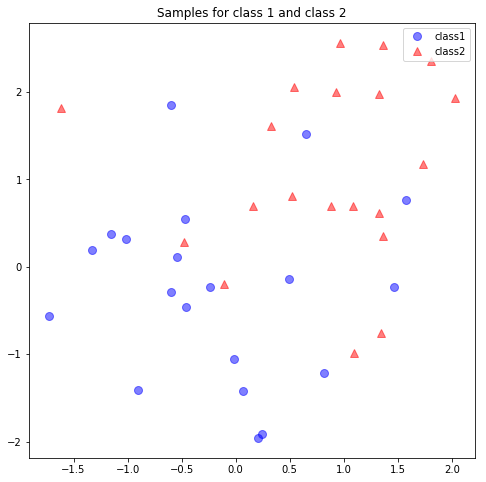

In [243]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
plt.rcParams['legend.fontsize'] = 10   

ax.plot(class1_sample[0,:], class1_sample[1,:],
        'o', markersize=8, color='blue', alpha=0.5, label='class1')
ax.plot(class2_sample[0,:], class2_sample[1,:],
        '^', markersize=8, alpha=0.5, color='red', label='class2')

plt.title('Samples for class 1 and class 2')
ax.legend(loc='upper right')

plt.show()

### Computing the mean of each class

mean vector for each class will be a 2x1 vector

In [244]:
mean_class1_x = np.mean(class1_sample[0])
mean_class1_y = np.mean(class1_sample[1])

mean_class1 = np.array([mean_class1_x, mean_class1_y])

mean_class2_x = np.mean(class2_sample[0])
mean_class2_y = np.mean(class2_sample[1])

mean_class2 = np.array([mean_class2_x, mean_class2_y])

print (mean_class1, mean_class2)

[-0.17610301 -0.26117067] [ 0.8299379   1.11197517]


Random vector w = [-0.5, 1.5]

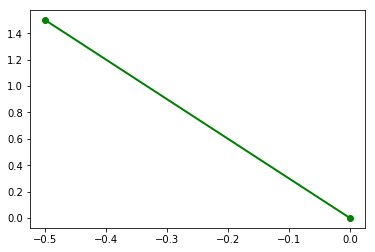

In [245]:
fig = plt.figure()
ax = plt.axes()

plt.plot([0, -0.5], [0, 1.5], 'go-', label='line 1', linewidth=2)


### Choices of w

In [246]:
def compute_projections_and_plot(w):
    Y_first_class = w.reshape(1, 2).dot(class1_sample)
    Y_second_class = w.reshape(1, 2).dot(class2_sample)
    pyplot.hist(Y_first_class[0],  alpha=0.5, label='class 1')
    pyplot.hist(Y_second_class[0],  alpha=0.5, label='class 2')
    pyplot.legend(loc='upper right')
    pyplot.title("Plot for choice of w as: "+str(w))
    pyplot.show()

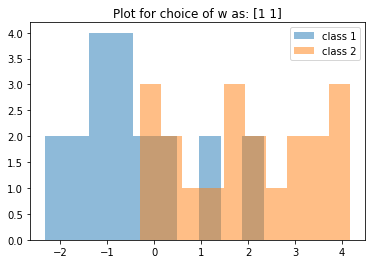

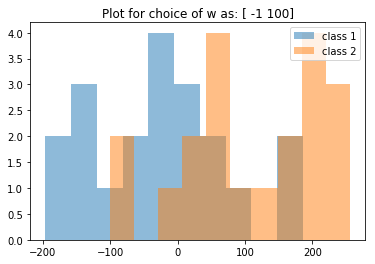

In [247]:
# [1, 1] [-1, 1] [-1, -1], [1, -1]

choices_of_w = [[1, 1], [-1, 100]]

for choice in choices_of_w:
    w = np.array(choice)
    compute_projections_and_plot(w)
    



It is clear that when the wt vector lies in 2nd or 3rd quad, there is a lot of overlap

Now we try various combinations in 1st or 4th quad

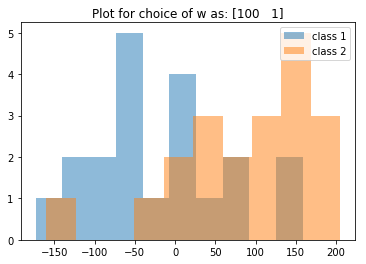

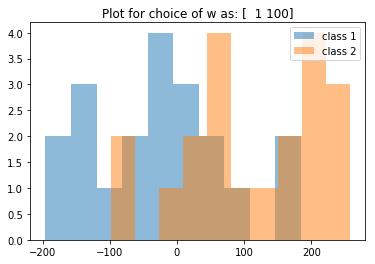

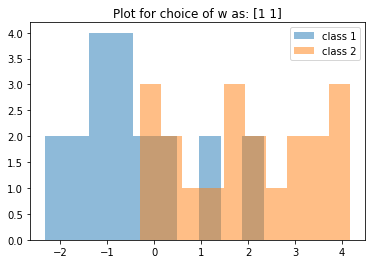

In [248]:
choices_of_w = [[100, 1], [1, 100], [1,1]]

for choice in choices_of_w:
    w = np.array(choice)
    compute_projections_and_plot(w)
    

It seems as if when x and y are similar there is best separation

### Y = W.x: computing the projections

In [249]:
w = np.array([[1, 1]])
print(w.shape)
Y_first_class = w.reshape(1, 2).dot(class1_sample)

Y_first_class

Y_second_class = w.reshape(1, 2).dot(class2_sample)

Y_second_class[0]

(1, 2)


array([ 2.90983486,  1.58324802, -0.1983662 ,  2.59648346,  0.58057813,
        1.93900169,  1.93475429,  3.96227964,  0.8515701 ,  3.30680856,
        1.33516679, -0.3025416 ,  4.16876585,  2.93152278,  1.71651627,
        3.89943217,  3.52881762,  0.2021574 ,  1.78803972,  0.10419186])

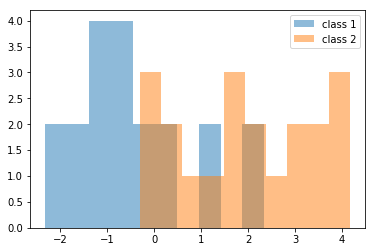

In [250]:


pyplot.hist(Y_first_class[0],  alpha=0.5, label='class 1')
pyplot.hist(Y_second_class[0],  alpha=0.5, label='class 2')
pyplot.legend(loc='upper right')
pyplot.show()

We know:

$$\frac{1}{n_{c}}\sum_{n} w^{T}x^{n} = w^{T}\frac{1}{n_{c}}\sum_{n} x^{n} = w^{T}\mu_{c} = m_{c}$$

Also

$$\frac{1}{n_{c}}\sum_{n} w^{T}x^{n} = \frac{1}{n_{c}}\sum_{n} y^{n} = m_{c}$$


In [251]:
mean_class1_red = np.mean(Y_first_class)

mean_class2_red = np.mean(Y_second_class)

print (mean_class1_red)

-0.437273676836


In [252]:
w.reshape(1,2).dot(mean_class1.reshape(2,1))

array([[-0.43727368]])

### Computing std devs for projected data for each class

- Insert eqn

In [253]:
s_class1_sq = ((Y_first_class - mean_class1_red).dot((Y_first_class - mean_class1_red).T)/20)[0][0]

s_class1_sq

s_class2_sq = ((Y_second_class - mean_class2_red).dot((Y_second_class - mean_class2_red).T)/20)[0][0]

s_class2_sq

1.9617123683811037

In [254]:
w.reshape(2,1).T.dot((class1_sample - mean_class1.reshape(2, 1)).dot((class1_sample - mean_class1.reshape(2, 1)).T.dot(w.reshape(2, 1))))

array([[ 33.68743401]])

### Computing Fisher Ratio F(w)

$$F(w) = \frac{(m_{a} + m_{b})^{2}}{\frac{n_{a}}{n_{a} + n_{b}}s_{a}^{2} + \frac{n_{b}}{n_{a} + n_{b}}s_{b}^{2}}$$

In [255]:
w = np.array([[1,1]]) # 1.2418472320582281 for [1,1]

def FisherScore(w):
    
    print ("w: ", str(w))
    
    Y_first_class = w.reshape(1, 2).dot(class1_sample)
    Y_second_class = w.reshape(1, 2).dot(class2_sample)
    
    mean_class1_red = np.mean(Y_first_class)
    mean_class2_red = np.mean(Y_second_class)

    s_class1_sq = ((Y_first_class - mean_class1_red).dot((Y_first_class - mean_class1_red).T)/20)[0][0]
    s_class2_sq = ((Y_second_class - mean_class2_red).dot((Y_second_class - mean_class2_red).T)/20)[0][0]

    n_a = len(class1_sample[0])
    n_b = len(class2_sample[0])

    F_numerator = (mean_class1_red + mean_class2_red)**2

    F_denominator = (n_a/(n_a + n_b))*s_class1_sq + (n_a/(n_a + n_b))*s_class2_sq

    F = F_numerator/F_denominator

    return F

FisherScore(w)

w:  [[1 1]]


1.2418472320582281

### w(θ) = R(θ)w(0) 

In [256]:
w = np.array([[1,1]])

thetas = [np.pi/4, 2*np.pi/4, 3*np.pi/4, 4*np.pi/4, 5*np.pi/4, 6*np.pi/4, 7*np.pi/4, 8*np.pi/4]

FisherScores = []

for theta in thetas:
    w = np.array([[1,1]])
    R = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
    w = R.dot(w.reshape(2,1))
    w.reshape(1,2)
    FisherScores.append(FisherScore(w))


print (FisherScores)

print(thetas)

w:  [[  1.11022302e-16]
 [  1.41421356e+00]]
w:  [[-1.]
 [ 1.]]
w:  [[ -1.41421356e+00]
 [  1.11022302e-16]]
w:  [[-1.]
 [-1.]]
w:  [[ -2.22044605e-16]
 [ -1.41421356e+00]]
w:  [[ 1.]
 [-1.]]
w:  [[  1.41421356e+00]
 [ -3.33066907e-16]]
w:  [[ 1.]
 [ 1.]]
[0.69359793091355593, 0.022571117390313974, 0.5877759542567782, 1.2418472320582283, 0.6935979309135567, 0.022571117390314008, 0.58777595425677798, 1.2418472320582279]
[0.7853981633974483, 1.5707963267948966, 2.356194490192345, 3.141592653589793, 3.9269908169872414, 4.71238898038469, 5.497787143782138, 6.283185307179586]


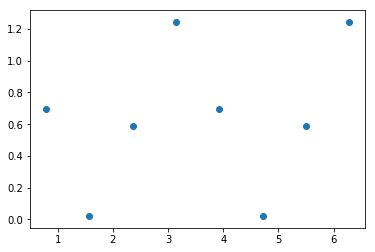

In [257]:
plt.scatter(thetas, FisherScores)

Best value of F occurs of theta = pi and theta = 2pi

Compute the line

### Compute logodds for each point

In [258]:
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 100).T
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 100).T

In [259]:
set_of_points = []

for index in range(len(class1_sample[0])):
    set_of_points.append([class1_sample[0][index], class1_sample[1][index]])
    
for index in range(len(class2_sample[0])):
    set_of_points.append([class2_sample[0][index], class2_sample[1][index]])
    
set_of_points = np.array(set_of_points)

set_of_points

array([[ -2.19671888e-01,   3.57112572e-01],
       [  1.47789404e+00,  -5.18270218e-01],
       [ -8.08493603e-01,  -5.01757044e-01],
       [  9.15402118e-01,   3.28751110e-01],
       [ -5.29760204e-01,   5.13267433e-01],
       [  9.70775493e-02,   9.68644991e-01],
       [ -7.02053094e-01,  -3.27662147e-01],
       [ -3.92108153e-01,  -1.46351495e+00],
       [  2.96120277e-01,   2.61055272e-01],
       [  5.11345664e-03,  -2.34587133e-01],
       [ -1.41537074e+00,  -4.20645323e-01],
       [ -3.42714517e-01,  -8.02277269e-01],
       [ -1.61285712e-01,   4.04050857e-01],
       [  1.88618590e+00,   1.74577813e-01],
       [  2.57550391e-01,  -7.44459158e-02],
       [ -1.91877122e+00,  -2.65138754e-02],
       [  6.02302099e-02,   2.46324211e+00],
       [ -1.92360965e-01,   3.01547342e-01],
       [ -3.47117697e-02,  -1.16867804e+00],
       [  1.14282281e+00,   7.51933033e-01],
       [  7.91031947e-01,  -9.09387455e-01],
       [  1.40279431e+00,  -1.40185106e+00],
       [  

In [260]:
mean_class1.shape

(2,)

In [261]:
inverse_cov = np.linalg.inv(cov_mat1)

log_odds = []

points_where_log_odds_positive = []
points_where_log_odds_negative = []
points_where_log_odds_zero = []


for point in set_of_points: 

    x_minus_mu_1 = inverse_cov.dot((point.reshape(2,1) - mean_class1.reshape(2,1)))

    x_minus_mu_1 = ((point.reshape(2,1) - mean_class1.reshape(2,1)).T).dot(x_minus_mu_1)

    x_minus_mu_1 = x_minus_mu_1[0][0]

    



    x_minus_mu_2 = inverse_cov.dot((point.reshape(2,1) - mean_class2.reshape(2,1)))

    x_minus_mu_2 = ((point.reshape(2,1) - mean_class2.reshape(2,1)).T).dot(x_minus_mu_2)

    x_minus_mu_2 = x_minus_mu_2[0][0]

    

    log_odd = 0.5 * (x_minus_mu_1 - x_minus_mu_2)
    

    if (log_odd > 0.025):
        points_where_log_odds_positive.append(point)
    elif (log_odd < -0.025):
        points_where_log_odds_negative.append(point)
    else:
        print (log_odd)
        points_where_log_odds_zero.append(point)

    
points_where_log_odds_zero

0.0198661809243


[array([ 0.52194157,  0.29698467])]

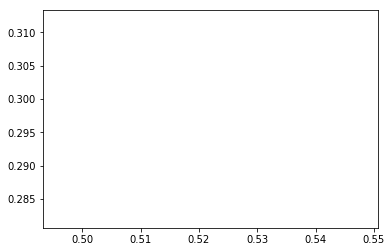

In [264]:
points_where_log_odds_zero = np.array(points_where_log_odds_zero)

points_where_log_odds_zero_x = points_where_log_odds_zero[:,0]
points_where_log_odds_zero_y = points_where_log_odds_zero[:,1]

plt.plot(points_where_log_odds_zero_x, points_where_log_odds_zero_y)

### Equation of line where log odds vanishes

y - y1 = m (x-x1)

In [263]:
m = (points_where_log_odds_zero_y[1] - points_where_log_odds_zero_y[0])/ (points_where_log_odds_zero_x[1] - points_where_log_odds_zero_x[0])

m

IndexError: index 1 is out of bounds for axis 0 with size 1

### Eqn : y - 0.6 = -0.76 (x - 0.1)

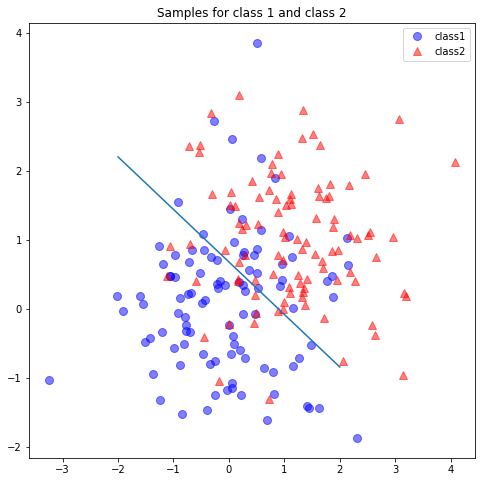

In [265]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
plt.rcParams['legend.fontsize'] = 10   

ax.plot(class1_sample[0,:], class1_sample[1,:],
        'o', markersize=8, color='blue', alpha=0.5, label='class1')
ax.plot(class2_sample[0,:], class2_sample[1,:],
        '^', markersize=8, alpha=0.5, color='red', label='class2')

ax.plot([-2,2], [2.2, -0.84])

plt.title('Samples for class 1 and class 2')
ax.legend(loc='upper right')

plt.show()

### Explore the consequences of using a formula for the discriminant


Compute new Fisher Score

new line

Here s_a and s_b are not normalized by respective populations

So if number of data points on one class is much more that would dominate the fisherscore -> projected w -> final projections

This is accounted for the Prior prob in Bayes rule which adds in a bias which takes into account if one class is much more likely to occur than the other